In [1]:
import pandas as pd
import numpy as np

In [2]:
#Lecture de la base des donn√©es
df = pd.read_csv("df_final_dubai.csv")

# STATISTIQUES DESCRIPTIVES

In [3]:
df.head()

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  TEMP_MOY  \
0  2024-01-01                 25                 23     23.75   
1  2024-01-02                 24                 22     23.25   
2  2024-01-03                 24                 21     22.25   
3  2024-01-04                 24                 22     23.25   
4  2024-01-05                 23                 21     21.75   

   HUMIDITY_MAX_PERCENT  HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  \
0                    71             53.25                 19   
1                    67             50.25                 28   
2                    63             47.25                 21   
3                    67             50.25                 37   
4                    60             45.00                 18   

   WINDSPEED_AVG_KMH  PRECIP_TOTAL_DAY_MM  SUNHOUR  ...  PRESSURE_MAX_MB  \
0               11.4                  0.0       10  ...             1018   
1               16.8                  0.0       10  ...             1018   
2               12.6                  0.0        9  ...             1017   
3               22.2                  0.0       10  ...             1017   
4               10.8                  0.0       10  ...             1017   

   CLOUDCOVER_AVG_PERCENT          CO        NO2        SO2         O3  \
0                   9.625  269.666667  16.775000   9.058333  83.083333   
1                  12.750  252.250000  14.841667   6.883333  87.250000   
2                  25.375  250.916667  17.187500   8.200000  80.541667   
3                  32.875  200.083333   9.270833   4.316667  86.916667   
4                   5.750  309.083333  25.420833  12.220833  77.916667   

       PM2.5       PM10        AQI   City  
0  25.158333  68.591667  64.993683  Dubai  
1  25.850000  64.383333  69.502499  Dubai  
2  23.575000  64.666667  59.740902  Dubai  
3  19.691667  46.479167  65.627639  Dubai  
4  26.054167  51.237500  52.790759  Dubai  

[5 rows x 21 columns]

In [4]:
df.describe()

MAX_TEMPERATURE_C  MIN_TEMPERATURE_C    TEMP_MOY  HUMIDITY_MAX_PERCENT  \
count         366.000000         366.000000  366.000000            366.000000   
mean           30.956284          26.103825   28.172814             60.598361   
std             5.864521           4.864198    5.206393              9.944773   
min            20.000000          17.000000   18.750000             36.000000   
25%            25.000000          21.000000   23.000000             54.000000   
50%            31.000000          26.000000   28.625000             60.000000   
75%            36.000000          31.000000   33.250000             67.000000   
max            42.000000          34.000000   36.750000             92.000000   

       HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  WINDSPEED_AVG_KMH  \
count         366.00000         366.000000         366.000000   
mean           45.44877          21.696721          13.018033   
std             7.45858           5.795448           3.477269   
min            27.00000           9.000000           5.400000   
25%            40.50000          18.000000          10.800000   
50%            45.00000          21.000000          12.600000   
75%            50.25000          25.000000          15.000000   
max            69.00000          41.000000          24.600000   

       PRECIP_TOTAL_DAY_MM     SUNHOUR  SR_EST_W_m2  PRESSURE_MAX_MB  \
count           366.000000  366.000000   366.000000       366.000000   
mean              0.144536   11.879781  1781.967213      1009.718579   
std               1.602536    1.659106   248.865831         7.989379   
min               0.000000    2.000000   300.000000       993.000000   
25%               0.000000   11.000000  1650.000000      1003.000000   
50%               0.000000   12.000000  1800.000000      1011.000000   
75%               0.000000   13.000000  1950.000000      1016.750000   
max              29.500000   14.000000  2100.000000      1024.000000   

       CLOUDCOVER_AVG_PERCENT           CO         NO2         SO2  \
count              366.000000   366.000000  366.000000  366.000000   
mean                 8.191257   440.464026   39.488297   20.308971   
std                 12.765182   124.290300   16.864561    7.917554   
min                  0.000000   200.083333    8.775000    4.316667   
25%                  0.156250   346.354167   27.672917   15.086458   
50%                  3.250000   434.416667   38.150000   20.333333   
75%                  9.906250   519.927083   48.171875   25.414583   
max                 92.375000  1012.750000  113.358333   53.775000   

               O3       PM2.5        PM10         AQI  
count  366.000000  366.000000  366.000000  366.000000  
mean    93.878415   41.574146  111.040619   85.113722  
std     36.922825   14.593006   65.267470   25.554694  
min     15.916667   12.087500   18.508333   40.561111  
25%     66.677083   30.313542   63.401042   67.222812  
50%     86.666667   40.427083   91.708333   78.422812  
75%    116.479167   51.193750  143.017708   98.414063  
max    210.583333   98.437500  374.762500  191.291810

In [5]:
df.isnull().sum()


Date                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
TEMP_MOY                  0
HUMIDITY_MAX_PERCENT      0
HUMIDITY_EST_AVG          0
WINDSPEED_MAX_KMH         0
WINDSPEED_AVG_KMH         0
PRECIP_TOTAL_DAY_MM       0
SUNHOUR                   0
SR_EST_W_m2               0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
CO                        0
NO2                       0
SO2                       0
O3                        0
PM2.5                     0
PM10                      0
AQI                       0
City                      0
dtype: int64

## Outliers

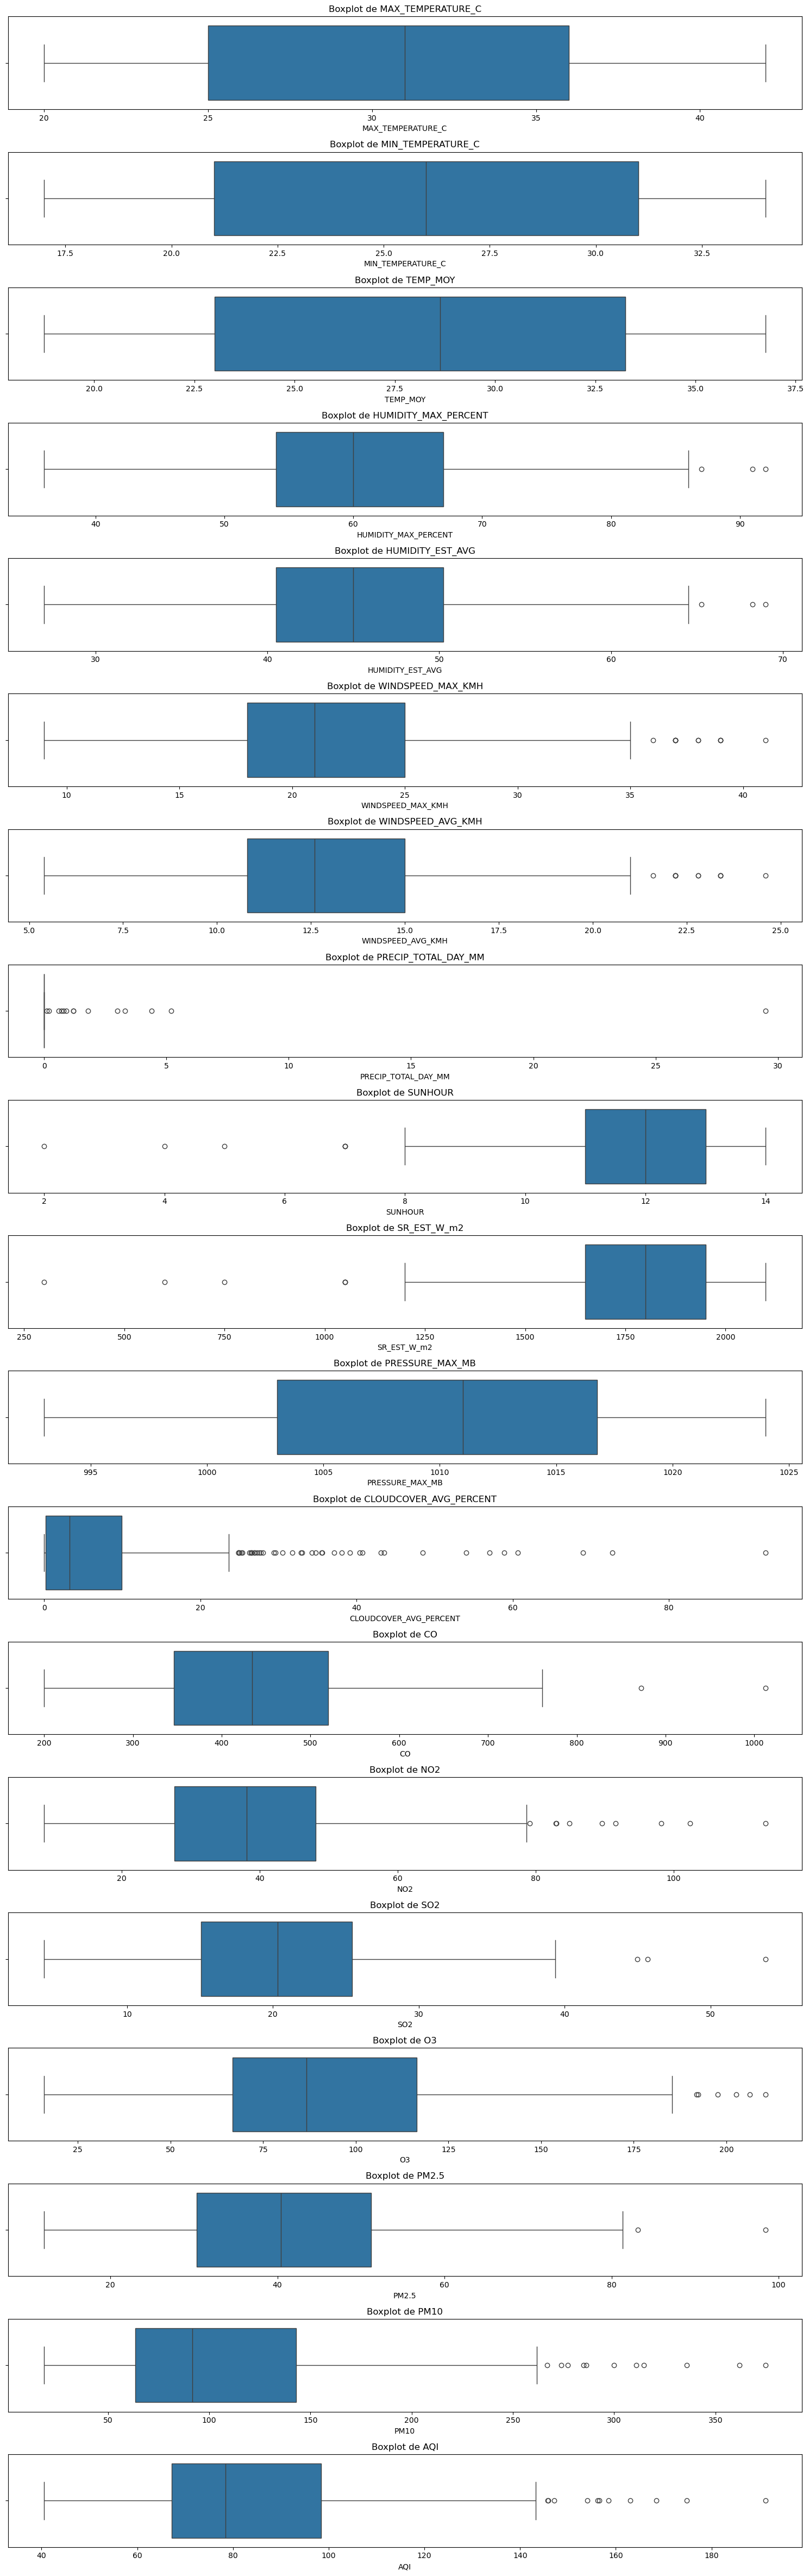

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# S√©lection des colonnes num√©riques
numeric_cols = df.select_dtypes(include=['number']).columns

# D√©finir la taille de la figure pour les boxplots
plt.figure(figsize=(15, len(numeric_cols) * 2.5))

# G√©n√©rer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

#### Traitement des valeurs extr√™mes (outliers)
Dans cette √©tude, les valeurs extr√™mes pr√©sentes dans les donn√©es n‚Äôont pas √©t√© supprim√©es ni imput√©es. Cette d√©cision repose sur le fait que, dans le contexte de la qualit√© de l‚Äôair, les outliers peuvent repr√©senter des √©v√©nements environnementaux r√©els et significatifs tels que des pics de pollution li√©s √† des conditions m√©t√©orologiques particuli√®res, des √©pisodes de trafic intense ou d'autres incidents ponctuels. Les exclure reviendrait √† ignorer des signaux critiques dans l‚Äôanalyse. Afin de pr√©server l‚Äôint√©grit√© des donn√©es et de refl√©ter fid√®lement leur variabilit√© naturelle, nous avons opt√© pour l‚Äôutilisation de mod√®les robustes (notamment la r√©gression avec norme de Huber) qui permettent de limiter l‚Äôimpact des valeurs extr√™mes sans pour autant les √©carter. Ce choix vise √† assurer √† la fois la validit√© scientifique de l‚Äôanalyse et la pertinence op√©rationnelle des r√©sultats, notamment pour la d√©tection et l‚Äôinterpr√©tation des √©pisodes de pollution atypiques.


In [7]:
# Transformation de la variable cible (log AQI)
df['log_AQI'] = np.log(df['AQI'] + 1)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

## Distribution des variables

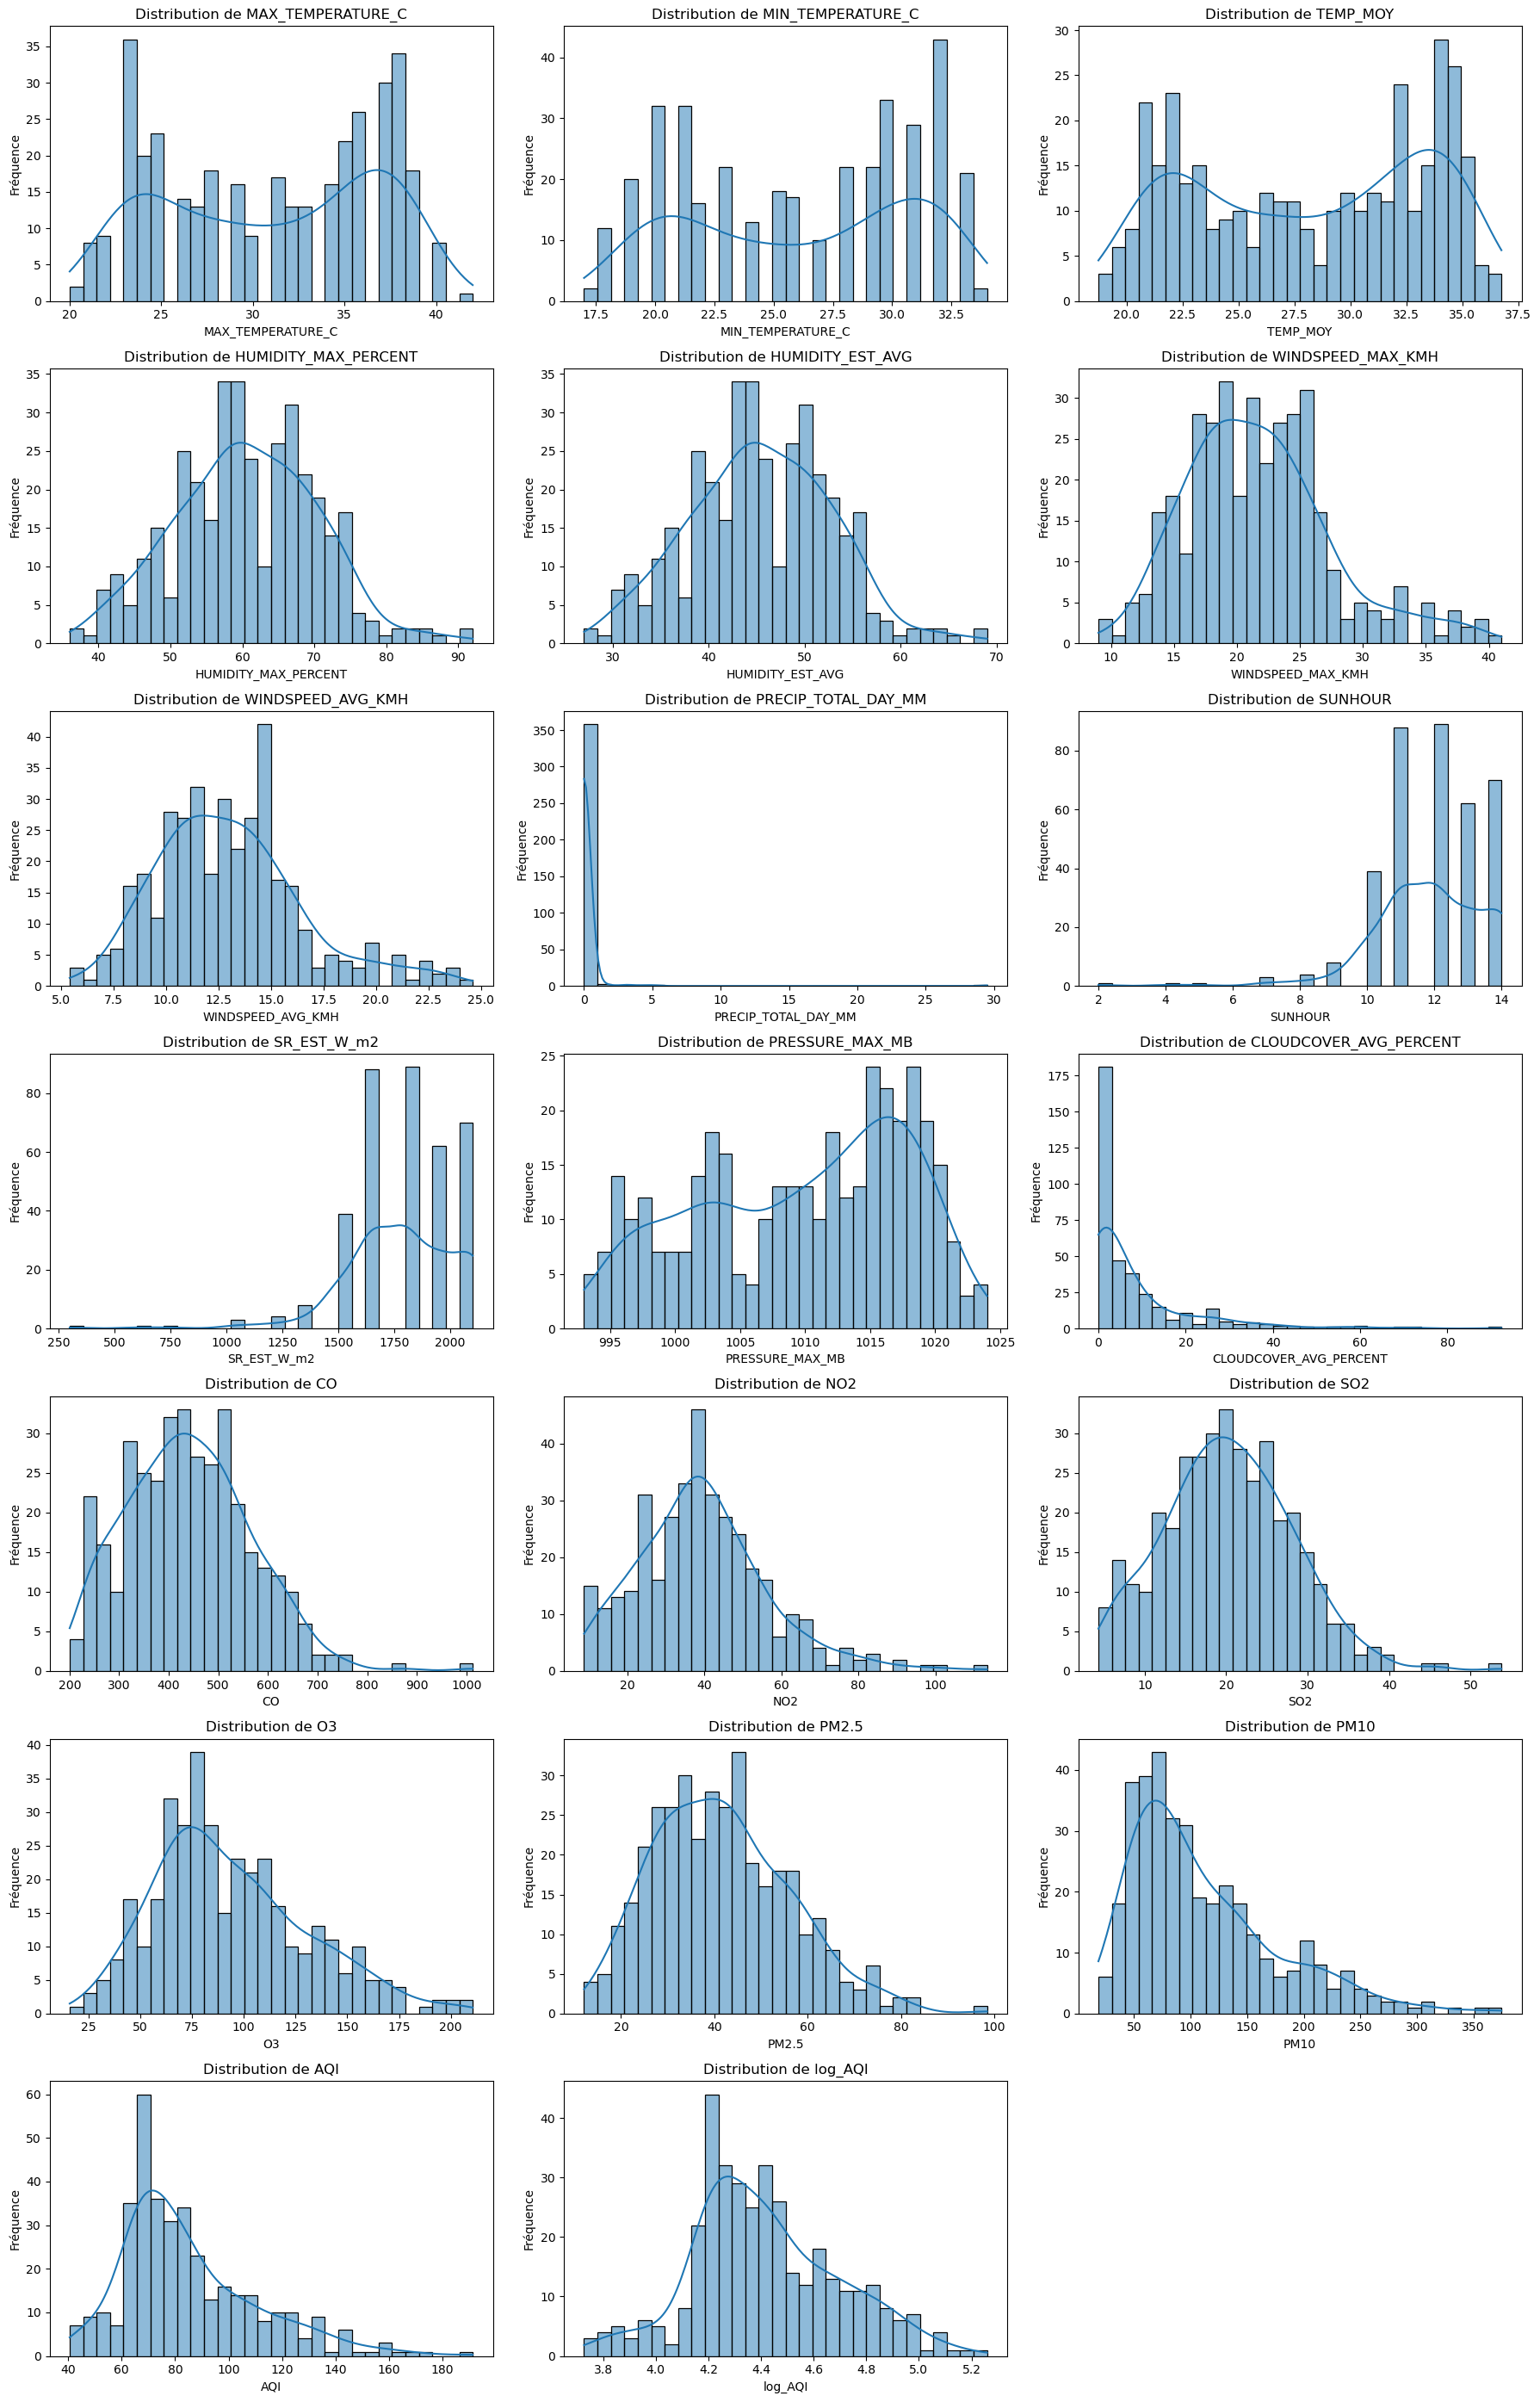

In [9]:
numeric_columns = df.select_dtypes(include=np.number).columns

# D√©finir la taille de la figure
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Cr√©er un histogramme avec courbe de densit√© pour chaque variable
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fr√©quence')

# Supprimer les axes vides si le nombre de variables < nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Corr√©lation entre les variables

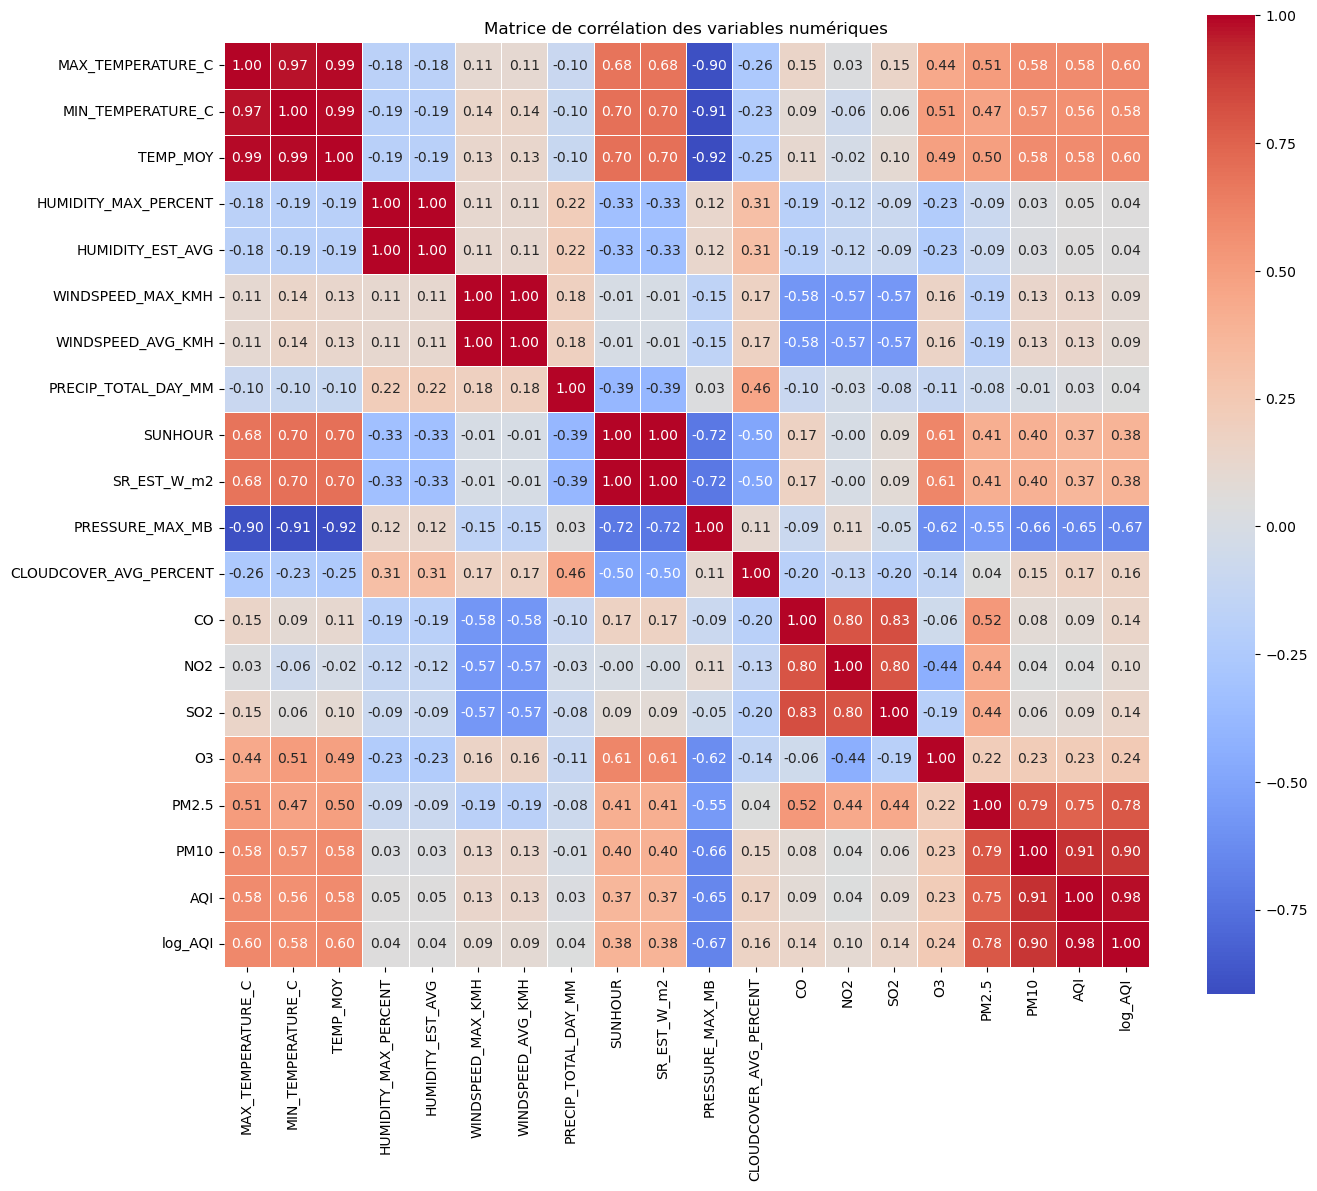

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corr√©lation
correlation_matrix = df.corr(numeric_only=True)

# D√©finir la taille de la figure
plt.figure(figsize=(14, 12))

# Cr√©er une heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matrice de corr√©lation des variables num√©riques")
plt.tight_layout()
plt.show()


In [11]:
print(df.columns)

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI'],
      dtype='object')


In [12]:
df['log_AQI'] = df['log_AQI'].astype(float)

In [13]:
df['log_AQI_lag1'] = df['log_AQI'].shift(1)
df.dropna(inplace=True)  # pour enlever la premi√®re ligne avec NaN


## Corr√©lations entre AQI et les autres variables

In [14]:
# Corr√©lations avec AQI uniquement (tri√©es)
corr_with_aqi = correlation_matrix[['AQI']].sort_values(by='AQI', ascending=False)

# Identification des couples de variables tr√®s fortement corr√©l√©es (> 0.8), en excluant la diagonale
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((var1, var2, corr_value))

# Conversion en DataFrame pour affichage
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Corr√©lation'])

print("Corr√©lations avec AQI (tri√©es) :")
print(corr_with_aqi)

print("\nPaires de variables tr√®s fortement corr√©l√©es (> 0.8) :")#ce sont des cas potentiels de multicolin√©arit√©, √† surveiller dans les mod√®les lin√©aires.
print(high_corr_df)

Corr√©lations avec AQI (tri√©es) :
                             AQI
AQI                     1.000000
log_AQI                 0.982281
PM10                    0.913929
PM2.5                   0.752318
MAX_TEMPERATURE_C       0.584340
TEMP_MOY                0.583033
MIN_TEMPERATURE_C       0.564064
SR_EST_W_m2             0.370025
SUNHOUR                 0.370025
O3                      0.225355
CLOUDCOVER_AVG_PERCENT  0.171980
WINDSPEED_AVG_KMH       0.134652
WINDSPEED_MAX_KMH       0.134652
SO2                     0.093258
CO                      0.085522
HUMIDITY_EST_AVG        0.045446
HUMIDITY_MAX_PERCENT    0.045446
NO2                     0.040886
PRECIP_TOTAL_DAY_MM     0.026185
PRESSURE_MAX_MB        -0.652626

Paires de variables tr√®s fortement corr√©l√©es (> 0.8) :
              Variable 1         Variable 2  Corr√©lation
0      MAX_TEMPERATURE_C  MIN_TEMPERATURE_C     0.970381
1      MAX_TEMPERATURE_C           TEMP_MOY     0.990464
2      MAX_TEMPERATURE_C    PRESSURE_MAX_

In [15]:
# Conversion de la date au bon forma
df['Date'] = pd.to_datetime(df['Date'])
# Cr√©ation des variables temporelles
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['week'] = df['Date'].dt.isocalendar().week
df['year'] = df['Date'].dt.year
df['TimeIndex'] = np.arange(len(df))

# Optionnel : ajouter une variable "saison"
def get_season(month):
    if month in [11, 12, 1, 2, 3, 4]:
        return 'hiver'
    else:  # mois de mai √† octobre
        return '√©t√©'

df['saison'] = df['month'].apply(get_season)
df = pd.get_dummies(df, columns=['saison'], drop_first=True)

In [16]:
df.columns

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI', 'log_AQI_lag1', 'day',
       'month', 'weekday', 'week', 'year', 'TimeIndex', 'saison_√©t√©'],
      dtype='object')

In [17]:
df.head()

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  TEMP_MOY  \
1 2024-01-02                 24                 22     23.25   
2 2024-01-03                 24                 21     22.25   
3 2024-01-04                 24                 22     23.25   
4 2024-01-05                 23                 21     21.75   
5 2024-01-06                 23                 21     22.00   

   HUMIDITY_MAX_PERCENT  HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  \
1                    67             50.25                 28   
2                    63             47.25                 21   
3                    67             50.25                 37   
4                    60             45.00                 18   
5                    60             45.00                 23   

   WINDSPEED_AVG_KMH  PRECIP_TOTAL_DAY_MM  SUNHOUR  ...   City   log_AQI  \
1               16.8                  0.0       10  ...  Dubai  4.255648   
2               12.6                  0.0        9  ...  Dubai  4.106617   
3               22.2                  0.0       10  ...  Dubai  4.199119   
4               10.8                  0.0       10  ...  Dubai  3.985102   
5               13.8                  0.0       10  ...  Dubai  4.151224   

   log_AQI_lag1  day  month  weekday  week  year  TimeIndex  saison_√©t√©  
1      4.189559    2      1        1     1  2024          0       False  
2      4.255648    3      1        2     1  2024          1       False  
3      4.106617    4      1        3     1  2024          2       False  
4      4.199119    5      1        4     1  2024          3       False  
5      3.985102    6      1        5     1  2024          4       False  

[5 rows x 30 columns]

# ECONOMETRIE

In [28]:
# üì¶ Importation des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

Voici les hypoth√®ses principales √† v√©rifier pour un mod√®le RLM (mod√®le de r√©gression lin√©aire robuste) :

1. Relation lin√©aire entre les variables explicatives et la variable d√©pendante.

2. Pas d'omission de variables importantes (sp√©cification correcte).

3. Ind√©pendance des erreurs (ex. test de Durbin-Watson).

4. Multicolin√©arit√© faible entre les variables explicatives (via le VIF).

5. Pr√©sence d‚Äôoutliers ou valeurs influentes (RLM les g√®re, mais il faut les visualiser).

üí° Contrairement √† l‚ÄôOLS, le RLM n'exige pas l‚Äôhomosc√©dasticit√© ni la normalit√© des erreurs.

In [19]:
# S√©lection des variables explicatives
# ‚úÖ Variables explicatives s√©lectionn√©es selon la litt√©rature et la corr√©lation avec log_AQI
features = ['PM2.5',
            #'PM10',
            #'CO', 
            'SO2' ,
            #'NO2',
            #'Benz√®ne',
            #'PRESSURE_MAX_MB',
            #'SUNHOUR',                 
            #'SR_EST_W_m2' ,            
            #'Tolu√®ne',                 
            'HUMIDITY_MAX_PERCENT',   
            #'HUMIDITY_EST_AVG',       
            #'MAX_TEMPERATURE_C',      
            #'TEMP_MOY',               
            #'MIN_TEMPERATURE_C',      
            'PRECIP_TOTAL_DAY_MM',    
            'O3',                     
            'WINDSPEED_MAX_KMH',     
            #'WINDSPEED_AVG_KMH',      
            'CLOUDCOVER_AVG_PERCENT',
            #'weekday',
            #'month',
            
            'TimeIndex',
            'saison_√©t√©',               
            'log_AQI_lag1',
]
X = df[features]
X = X.loc[:, ~X.columns.duplicated()]  # Supprimer les colonnes dupliqu√©es
X = X.astype(float)  # ‚Üê important
X = sm.add_constant(X)
y = df['log_AQI']



‚úÖ R√âSUM√â DU MOD√àLE ROBUSTE (RLM - Huber)
                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  365
Model:                            RLM   Df Residuals:                      354
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 16 Jul 2025                                         
Time:                        11:46:24                                         
No. Iterations:                    25                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

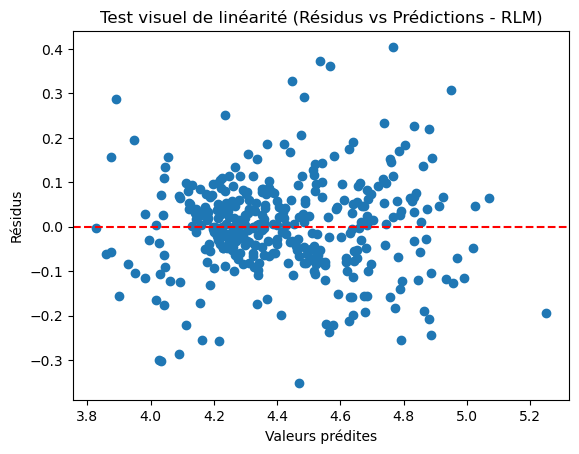


üìä VIF - Facteurs d'inflation de la variance
                  Variable         VIF
0                    const  464.139559
1                    PM2.5    2.402737
2                      SO2    2.442213
3     HUMIDITY_MAX_PERCENT    1.193564
4      PRECIP_TOTAL_DAY_MM    1.338641
5                       O3    1.448016
6        WINDSPEED_MAX_KMH    1.728466
7   CLOUDCOVER_AVG_PERCENT    1.686070
8                TimeIndex    1.398459
9               saison_√©t√©    1.847877
10            log_AQI_lag1    2.075204

üìä Ind√©pendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.957 (id√©al proche de 2)


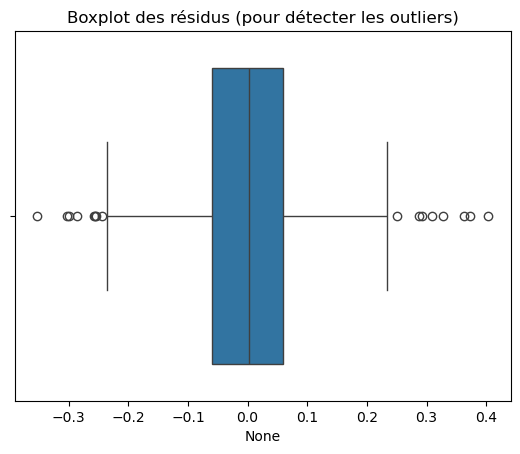

R¬≤ (pseudo) du mod√®le RLM : 0.8505


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

def verifier_rlm_robuste(X, y):
    # Ajout de la constante
    X_const = sm.add_constant(X)
    
    # Estimation du mod√®le RLM avec norme de Huber
    model_rlm = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
    results_rlm = model_rlm.fit()

    # R√©sum√©
    print("\n‚úÖ R√âSUM√â DU MOD√àLE ROBUSTE (RLM - Huber)")
    print(results_rlm.summary())
    
    # 1. Graphique R√©sidus vs Pr√©dictions (lin√©arit√©)
    plt.figure()
    plt.scatter(results_rlm.fittedvalues, results_rlm.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs pr√©dites")
    plt.ylabel("R√©sidus")
    plt.title("Test visuel de lin√©arit√© (R√©sidus vs Pr√©dictions - RLM)")
    plt.show()

    # 2. VIF - Multicolin√©arit√©
    print("\nüìä VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    # 3. Durbin-Watson (Ind√©pendance des erreurs)
    print("\nüìä Ind√©pendance des erreurs - Durbin-Watson")
    dw_stat = durbin_watson(results_rlm.resid)
    print(f"Durbin-Watson statistic : {dw_stat:.3f} (id√©al proche de 2)")

    # 4. Boxplot des r√©sidus (d√©tection d‚Äôoutliers)
    plt.figure()
    sns.boxplot(x=results_rlm.resid)
    plt.title("Boxplot des r√©sidus (pour d√©tecter les outliers)")
    plt.show()

    return results_rlm
results_rlm = verifier_rlm_robuste(X, y)

# y : variable observ√©e (log_AQI)
# y_pred : pr√©dictions du mod√®le RLM
# y.mean() : moyenne des valeurs observ√©es

y_pred = results_rlm.predict(sm.add_constant(X))


ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum((y - y_pred)**2)
r2_robust = 1 - (ss_residual / ss_total)

print(f"R¬≤ (pseudo) du mod√®le RLM : {r2_robust:.4f}")


Boxplot des r√©sidus :

- Le mod√®le s‚Äôajuste bien globalement (r√©sidus centr√©s sur 0).
- Le mod√®le RLM est bien adapt√©, car il est justement con√ßu pour r√©duire l‚Äôimpact de ces valeurs extr√™mes (robustesse).

Graphique des r√©sidus vs pr√©dictions :

1. **R√©partition al√©atoire autour de z√©ro**
   ‚Üí Les points semblent globalement centr√©s autour de la ligne rouge (r√©sidu = 0), sans motif clair.
   ‚úÖ **Cela soutient l‚Äôhypoth√®se de lin√©arit√©**.

2. **Pas de structure en U, ni en pente**
   ‚Üí Il n‚Äôy a pas de forme syst√©matique (courbe, vague ou c√¥ne).
   ‚úÖ Cela **sugg√®re que la forme fonctionnelle du mod√®le est correcte**.

3. **Pr√©sence d‚Äôun l√©ger regroupement autour des pr√©dictions moyennes (\~4.3 √† 4.6)**
   ‚Üí Ce n‚Äôest **pas probl√©matique**, cela refl√®te simplement la densit√© des pr√©dictions dans cette zone.

4. **Pas de forte h√©t√©rosc√©dasticit√© visible**
   ‚Üí L‚Äôamplitude des r√©sidus ne semble pas augmenter avec les valeurs pr√©dites.
   ‚úÖ **Pas d‚Äôh√©t√©rosc√©dasticit√© forte** visible ici.

**Conclusion :**

Ce graphique **confirme que le mod√®le RLM respecte bien l‚Äôhypoth√®se de lin√©arit√©** et **ne pr√©sente pas d‚Äôerreur de sp√©cification manifeste**.
C‚Äôest **un bon signe de validit√© du mod√®le.**


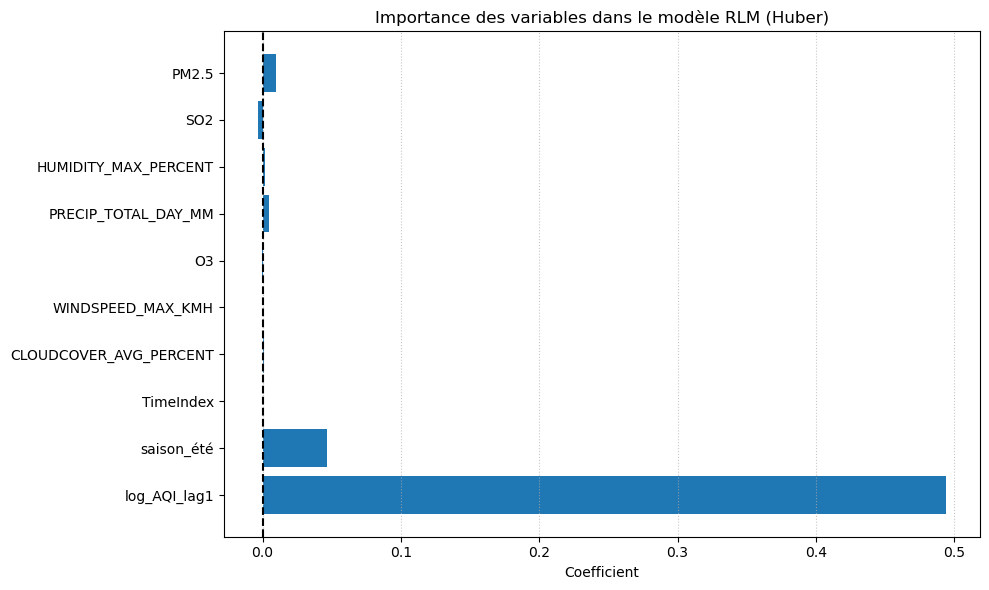

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# R√©sultats du mod√®le robuste (RLM - Huber)
data = {
    'Variable': [
        'PM2.5', 'SO2', 'HUMIDITY_MAX_PERCENT', 'PRECIP_TOTAL_DAY_MM',
        'O3', 'WINDSPEED_MAX_KMH', 'CLOUDCOVER_AVG_PERCENT', 'TimeIndex',
        'saison_√©t√©', 'log_AQI_lag1'
    ],
    'Coefficient': [
        0.0098, -0.0033, 0.0017, 0.0048, -0.0004,
        0.0004, 0.0010, 0.00001269, 0.0465, 0.4937
    ]
}

df_resultats = pd.DataFrame(data)

# Cr√©ation du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(df_resultats['Variable'], df_resultats['Coefficient'])
plt.xlabel('Coefficient')
plt.title("Importance des variables dans le mod√®le RLM (Huber)")
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()  # Meilleure lisibilit√©

plt.show()


 **Interpr√©tation du graphique : Importance des variables (RLM - Huber)**

* **log\_AQI\_lag1** est **de loin la plus influente** ‚Üí forte persistance de l‚ÄôAQI (effet de m√©moire).
* **saison\_√©t√©** a un effet mod√©r√© mais significatif ‚Üí impact saisonnier sur la pollution.
* Les autres variables (PM2.5, SO2, etc.) ont un effet plus **faible** mais PM2.5 reste significatif.
* **TimeIndex** et **vent/vitesse du vent** n‚Äôont **quasiment aucun effet** dans ce mod√®le.

 **Conclusion :** L‚ÄôAQI d√©pend surtout de sa valeur pass√©e et de la saison. Les polluants comme PM2.5 contribuent mais de fa√ßon plus marginale.


In [22]:
# Liste uniquement les colonnes qui ne sont pas num√©riques
#non_numeriques = df.select_dtypes(exclude=['int64', 'float64']).columns
#print("\nColonnes non num√©riques √† corriger :", list(non_numeriques))

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

MAE : 0.0802
RMSE : 0.1081


Plus ces valeurs sont **proches de 0**, **mieux le mod√®le pr√©dit**.
Ici, les erreurs sont **petites**, donc le mod√®le est **plut√¥t bon**.


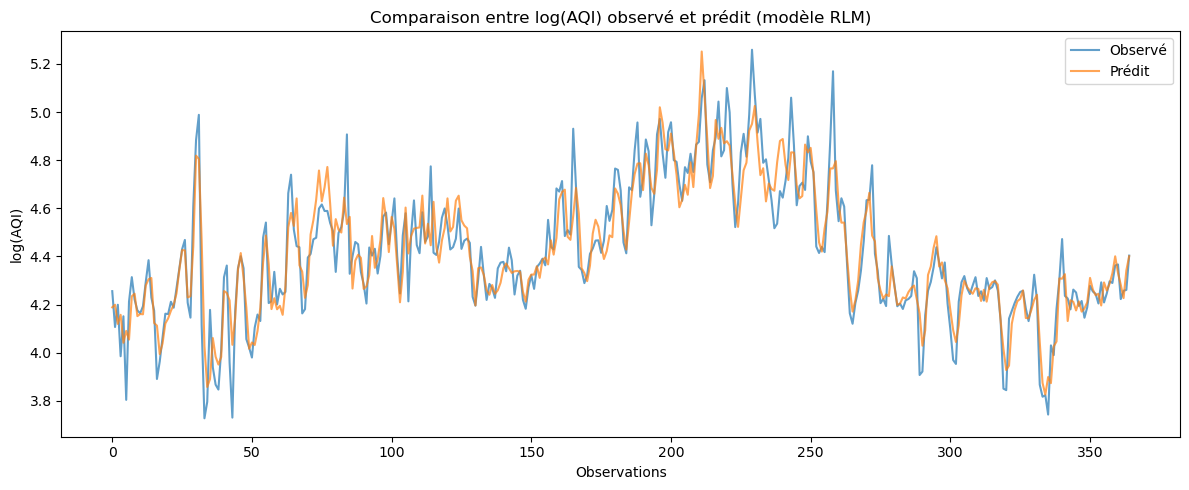

In [24]:
# Pr√©dictions du mod√®le RLM
y_pred = results_rlm.fittedvalues
y_true = y

# Cr√©er un DataFrame pour tracer les courbes
comparison_df = pd.DataFrame({
    'log_AQI_observ√©': y_true,
    'log_AQI_pr√©dit': y_pred
})

# Tracer les courbes
plt.figure(figsize=(12, 5))
plt.plot(comparison_df['log_AQI_observ√©'].values, label='Observ√©', alpha=0.7)
plt.plot(comparison_df['log_AQI_pr√©dit'].values, label='Pr√©dit', alpha=0.7)
plt.title("Comparaison entre log(AQI) observ√© et pr√©dit (mod√®le RLM)")
plt.xlabel("Observations")
plt.ylabel("log(AQI)")
plt.legend()
plt.tight_layout()
plt.show()

# Evolution des polluants dans le temps

In [25]:
print(df.columns)


Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI', 'log_AQI_lag1', 'day',
       'month', 'weekday', 'week', 'year', 'TimeIndex', 'saison_√©t√©'],
      dtype='object')


In [26]:
df['periode'] = (df['Date'].dt.month >= 7).astype(int)

# S√©lection de quelques variables explicatives pertinentes

features = ['PM2.5',
            #'PM10',
            #'CO', 
            'SO2' ,
            #'NO2',
            #'Benz√®ne',
            #'PRESSURE_MAX_MB',
            #'SUNHOUR',                 
            #'SR_EST_W_m2' ,            
            #'Tolu√®ne',                 
            'HUMIDITY_MAX_PERCENT',   
            #'HUMIDITY_EST_AVG',       
            #'MAX_TEMPERATURE_C',      
            #'TEMP_MOY',               
            #'MIN_TEMPERATURE_C',      
            'PRECIP_TOTAL_DAY_MM',    
            'O3',                     
            'WINDSPEED_MAX_KMH',     
            #'WINDSPEED_AVG_KMH',      
            'CLOUDCOVER_AVG_PERCENT',
            #'weekday',
            'month',
            
            'TimeIndex',
            'saison_√©t√©',               
            'log_AQI_lag1',
]
       
df_model = df[['log_AQI', 'periode'] + features].copy()

# Cr√©ation automatique des variables d‚Äôinteraction avec la p√©riode
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

for var in features:
    for m in range(1, 13):  # pour les 12 mois
        df_model[f"{var}_x_month_{m}"] = df_model[var] * (df_model['month'] == m).astype(int)

# Cr√©ation dynamique de la liste compl√®te des variables (features + interactions)
interaction_vars = [f"{var}_x_month" for var in features]
X_cols = features + ['month'] + interaction_vars


# Cr√©ation de X et y
interaction_vars = [f'{var}_x_month_{m}' for var in features for m in range(1, 13)]
X = df_model[features + interaction_vars]
X_const = sm.add_constant(X)
y = df_model['log_AQI']
X_const = X_const.astype(float)

# Mod√®le RLM robuste avec norme de Huber
model_rlm_interact = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
# Affichage du r√©sum√©
print(model_rlm_interact.summary())

import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)


                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  365
Model:                            RLM   Df Residuals:                      252
Method:                          IRLS   Df Model:                          112
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 16 Jul 2025                                         
Time:                        11:46:26                                         
No. Iterations:                    50                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

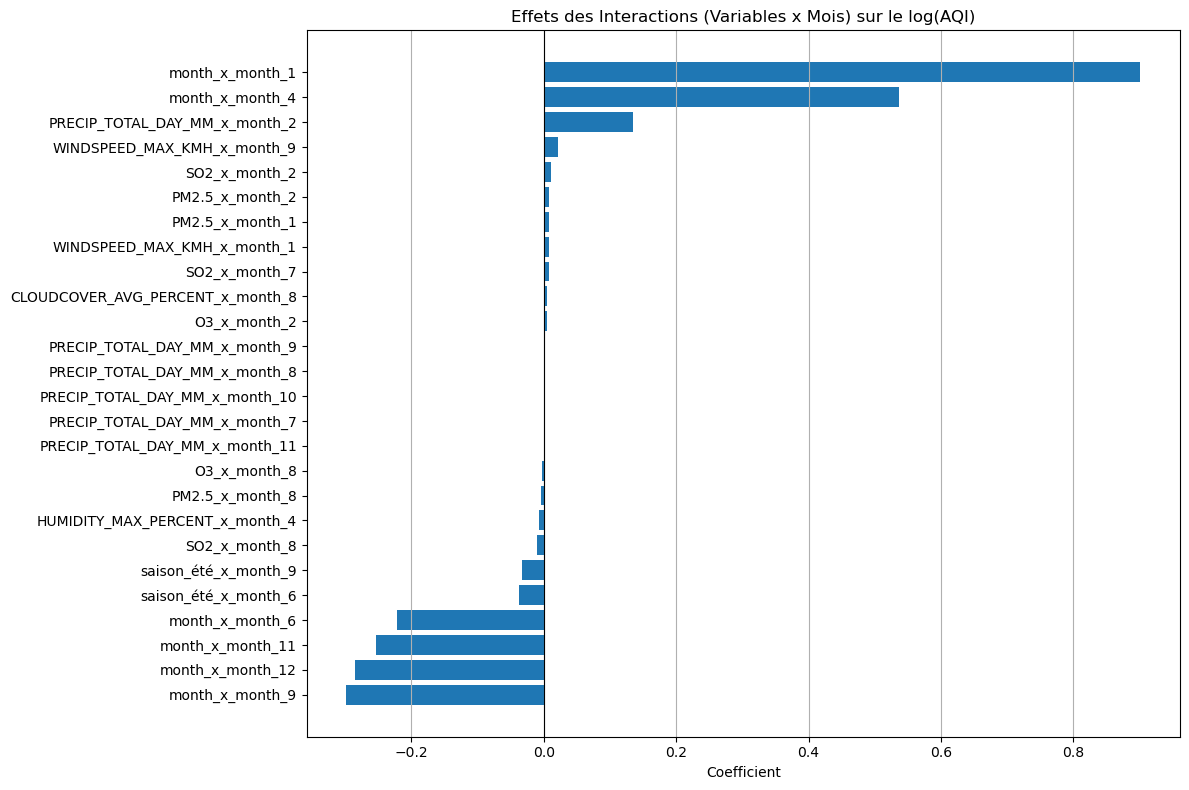

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste manuelle des coefficients d'interaction significatifs (p < 0.05)
interaction_coeffs = {
    'PM2.5_x_month_1': 0.0081,
    'PM2.5_x_month_2': 0.0083,
    'PM2.5_x_month_8': -0.0039,
    'SO2_x_month_2': 0.0103,
    'SO2_x_month_7': 0.0077,
    'SO2_x_month_8': -0.0105,
    'HUMIDITY_MAX_PERCENT_x_month_4': -0.0079,
    'PRECIP_TOTAL_DAY_MM_x_month_2': 0.1345,
    'PRECIP_TOTAL_DAY_MM_x_month_7': 5.378e-15,
    'PRECIP_TOTAL_DAY_MM_x_month_8': 1.484e-14,
    'PRECIP_TOTAL_DAY_MM_x_month_9': 2.397e-14,
    'PRECIP_TOTAL_DAY_MM_x_month_10': 1.384e-14,
    'PRECIP_TOTAL_DAY_MM_x_month_11': -1.956e-14,
    'O3_x_month_2': 0.0044,
    'O3_x_month_8': -0.0025,
    'WINDSPEED_MAX_KMH_x_month_1': 0.0079,
    'WINDSPEED_MAX_KMH_x_month_9': 0.0218,
    'CLOUDCOVER_AVG_PERCENT_x_month_8': 0.0054,
    'month_x_month_1': 0.9010,
    'month_x_month_4': 0.5358,
    'month_x_month_6': -0.2215,
    'month_x_month_9': -0.2982,
    'month_x_month_11': -0.2537,
    'month_x_month_12': -0.2849,
    'saison_√©t√©_x_month_6': -0.0369,
    'saison_√©t√©_x_month_9': -0.0331,
}

# Cr√©ation du DataFrame
df_interactions = pd.DataFrame(list(interaction_coeffs.items()), columns=["Variable", "Coefficient"])
df_interactions = df_interactions.sort_values(by="Coefficient")

# Trac√© du diagramme en barres
plt.figure(figsize=(12, 8))
plt.barh(df_interactions["Variable"], df_interactions["Coefficient"])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Effets des Interactions (Variables x Mois) sur le log(AQI)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X = df[features]
X_const = sm.add_constant(X)
X_const = X_const.astype(float)

# S√©parer les donn√©es
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.3, random_state=42)

# Refit sur les donn√©es d'entra√Ænement
model_rlm_train = sm.RLM(y_train, X_train, M=sm.robust.norms.HuberT()).fit()

# Pr√©dictions
y_pred_train = model_rlm_train.predict(X_train)
y_pred_test = model_rlm_train.predict(X_test)

# √âvaluer
print("R¬≤ train :", r2_score(y_train, y_pred_train))
print("R¬≤ test  :", r2_score(y_test, y_pred_test))


R¬≤ train : 0.8630077442281752
R¬≤ test  : 0.820777743288134


- √âcart faible entre train et test ‚Üí peu de sur-apprentissage (overfitting).

- Le mod√®le est assez g√©n√©ralisable.

- On peut dire qu‚Äôil mod√©lise bien la relation entre les variables et l‚ÄôAQI.

| Jeu de donn√©es | R¬≤    | Interpr√©tation                                                                      |
| -------------- | ----- | ----------------------------------------------------------------------------------- |
| **Train**      | 0.86 | Le mod√®le explique **86 %** de la variance de l‚ÄôAQI sur les donn√©es d‚Äôentra√Ænement. |
| **Test**       | 0.82 | Il explique **82 %** de la variance sur des donn√©es **non vues**.                   |
